In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data_raw=pd.read_csv('./data/BRCA1_HUMAN_Findlay_2018.csv')
data_raw.head(5)

,mutant,mutated_sequence,DMS_score,DMS_score_bin
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0


In [9]:
data_raw.shape

(1837, 4)

In [10]:
data_raw

,mutant,mutated_sequence,DMS_score,DMS_score_bin
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0
...,...,...,...,...
1832,I1855R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.464328,1
1833,I1855M,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.021941,1
1834,I1855L,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.233297,1
1835,I1855K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.863844,1


In [11]:
df=data_raw.copy()

In [12]:
import re 

def get_number_from_text(text):
    return re.findall(r'\d{1,4}',text)[0]

In [13]:
get_number_from_text('A10B')

'10'

In [14]:
df

,mutant,mutated_sequence,DMS_score,DMS_score_bin
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0
...,...,...,...,...
1832,I1855R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.464328,1
1833,I1855M,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.021941,1
1834,I1855L,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.233297,1
1835,I1855K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.863844,1


In [20]:
df_g = df.groupby(by=['position', 'DMS_score_bin']).apply(lambda x: x['DMS_score_bin'] == 1)

KeyError: 'position'

In [18]:
df_g

NameError: name 'df_g' is not defined

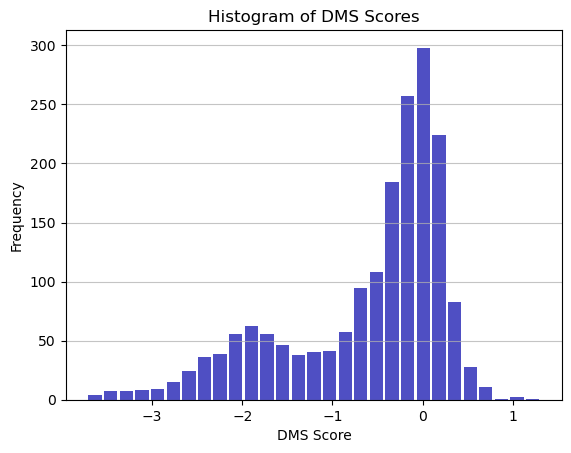

In [19]:
dms_scores = data_raw['DMS_score']
n, bins, patches = plt.hist(x=dms_scores, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)

# Add labels and title
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Histogram of DMS Scores')

# Add a grid
plt.grid(axis='y', alpha=0.75)

# Show the histogram
plt.show()

In [21]:
print(data_raw.columns)

Index(['mutant', 'mutated_sequence', 'DMS_score', 'DMS_score_bin'], dtype='object')


In [22]:
position = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ..., 1855, 1855, 1855, 1855, 1855]  # replace with your own data

In [23]:
position_df = pd.DataFrame({'position': position})

In [24]:
data_with_position = pd.concat([data_raw, position_df], axis=1)

In [25]:
print(data_with_position.columns)

Index(['mutant', 'mutated_sequence', 'DMS_score', 'DMS_score_bin', 'position'], dtype='object')


In [26]:
print(data_raw.columns)

Index(['mutant', 'mutated_sequence', 'DMS_score', 'DMS_score_bin'], dtype='object')


In [27]:
data_raw['position'] = data_raw['mutant'].str.extract('(\d+)').astype(int)

In [28]:
print(data_raw.head())

  mutant                                   mutated_sequence  DMS_score  \
0    M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1    M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2    M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3    M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4    M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   

   DMS_score_bin  position  
0              0         1  
1              0         1  
2              0         1  
3              0         1  
4              0         1  


In [29]:
print(data_raw.columns)

Index(['mutant', 'mutated_sequence', 'DMS_score', 'DMS_score_bin', 'position'], dtype='object')


In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
data_raw['DMS_score_normalized'] = scaler.fit_transform(data_raw[['DMS_score']])

In [33]:
print(data_raw)

      mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
...      ...                                                ...        ...   
1832  I1855R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.464328   
1833  I1855M  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.021941   
1834  I1855L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.233297   
1835  I1855K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.863844   
1836  I1855T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.291519   

      DMS_score_bin  position  DMS_score_normalized  
0        

In [34]:
data_raw['dms_score_normalized'] = (data_raw['DMS_score'] - data_raw['DMS_score'].min()) / (data_raw['DMS_score'].max() - data_raw['DMS_score'].min())

In [35]:
data_pivot = data_raw.pivot(index='mutant', columns='position', values='dms_score_normalized')


In [36]:
import seaborn as sns

In [37]:
'data_raw["new_aa"]=test1[1]
data_raw.head'

SyntaxError: unterminated string literal (detected at line 1) (2623361666.py, line 1)

In [38]:
test1=data_raw.mutant.str.extract(r'(\d)([ARNDCQEGHILKTMfPOUSTWYV])')
test1

,0,1
0,1,I
1,1,V
2,1,T
3,1,R
4,1,L
...,...,...
1832,5,R
1833,5,M
1834,5,L
1835,5,K


In [39]:
data_raw["new_aa"]=test1[1]
data_raw.head

<bound method NDFrame.head of       mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
...      ...                                                ...        ...   
1832  I1855R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.464328   
1833  I1855M  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.021941   
1834  I1855L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.233297   
1835  I1855K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.863844   
1836  I1855T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.291519   

      DMS_score_bin  position  DM

In [40]:
print(data_raw.columns)

Index(['mutant', 'mutated_sequence', 'DMS_score', 'DMS_score_bin', 'position',
       'DMS_score_normalized', 'dms_score_normalized', 'new_aa'],
      dtype='object')


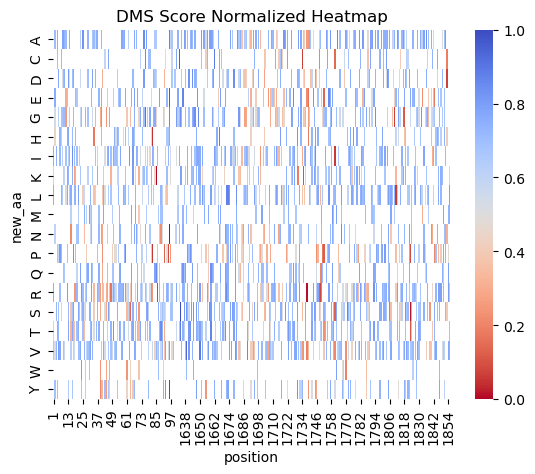

In [41]:
# create a pivot table with 'position' as index, 'new_aa' as columns, and 'dms_score_normalized' as values
pivot_table = data_raw.pivot_table(index='new_aa', columns='position', values='dms_score_normalized', aggfunc='mean')

# plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r')

# add labels and title
plt.xlabel('position')
plt.ylabel('new_aa')
plt.title('DMS Score Normalized Heatmap')
plt.show()

In [42]:
# create a boolean mask for rows where 'DMS_score_bin' is not 1
mask = data_raw['DMS_score_bin'] != 1

# use boolean indexing to filter the data and create a new DataFrame
filtered_data = data_raw[mask]

# print the shape of the filtered data to verify that rows have been removed
print(filtered_data.shape)

(474, 8)


In [43]:
copy_raw = data_raw[data_raw['DMS_score_bin'] == 0].copy()

In [44]:
copy_raw

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,1,0.242003,0.242003,I
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,1,0.336824,0.336824,V
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1,0.410270,0.410270,T
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,1,0.246092,0.246092,R
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,1,0.239137,0.239137,L
...,...,...,...,...,...,...,...,...
1822,Y1853D,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-3.351372,0,1853,0.073003,0.073003,D
1823,Y1853C,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.763438,0,1853,0.190002,0.190002,C
1824,Y1853S,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.698237,0,1853,0.401978,0.401978,S
1825,Y1853N,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.167195,0,1853,0.308655,0.308655,N


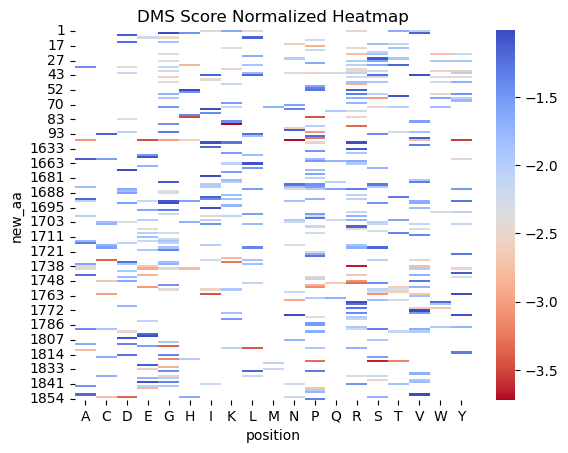

In [45]:
# create a pivot table with 'position' as index, 'new_aa' as columns, and 'dms_score_normalized' as values
pivot_table = copy_raw.pivot_table(index='position', columns='new_aa', values='DMS_score', aggfunc='mean')

# plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r')

# add labels and title
plt.xlabel('position')
plt.ylabel('new_aa')
plt.title('DMS Score Normalized Heatmap')
plt.show()

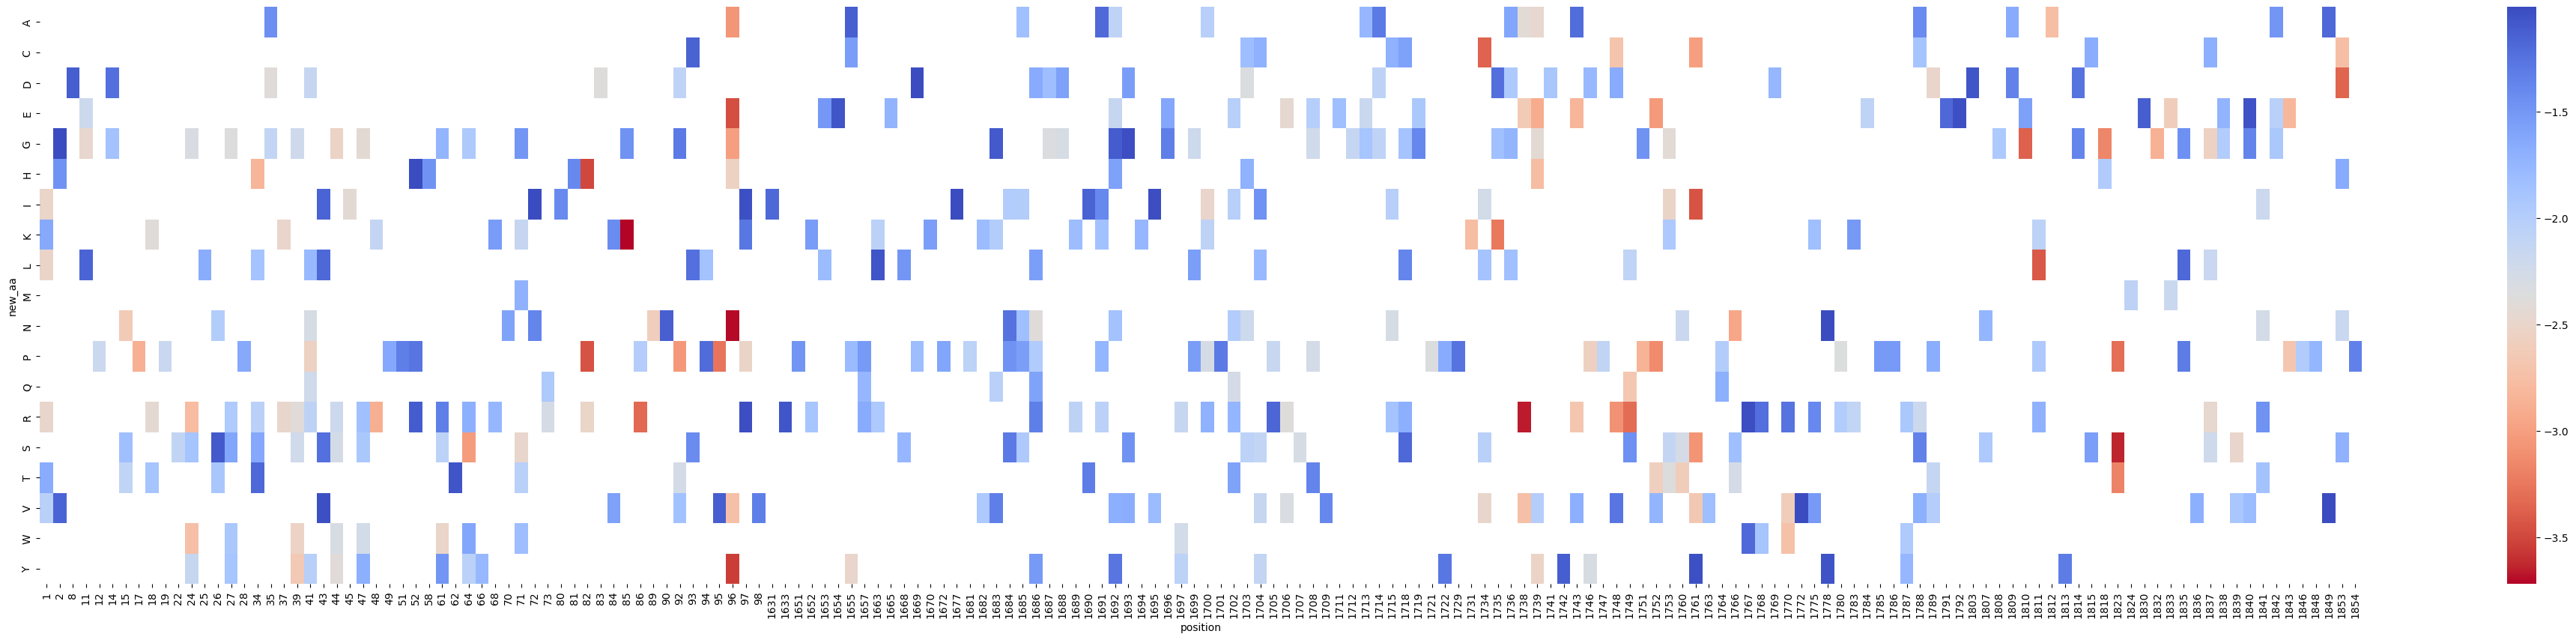

In [49]:
# create a pivot table with 'position' as index, 'new_aa' as columns, and 'dms_score_normalized' as values
pivot_table = copy_raw.pivot_table(index='new_aa', columns='position', values='DMS_score', aggfunc='mean')

fig, ax = plt.subplots(figsize=(50,10))

# plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r')

# add labels and title
plt.xlabel('position')
plt.ylabel('new_aa')
plt.show()

In [47]:
# List of polar amino acids
polar_amino_acids = ['S', 'T', 'Y', 'C', 'N', 'Q']

# Filter the dataset for polar amino acids
polar_data = copy_raw[copy_raw['new_aa'].isin(polar_amino_acids)][['new_aa', 'DMS_score']]

# Print the filtered dataset
print(polar_data)

     new_aa  DMS_score
2         T  -1.656569
84        T  -2.096973
88        S  -1.834711
89        N  -2.633053
108       T  -1.887430
...     ...        ...
1750      T  -1.863429
1752      N  -2.262144
1823      C  -2.763438
1824      S  -1.698237
1825      N  -2.167195

[118 rows x 2 columns]


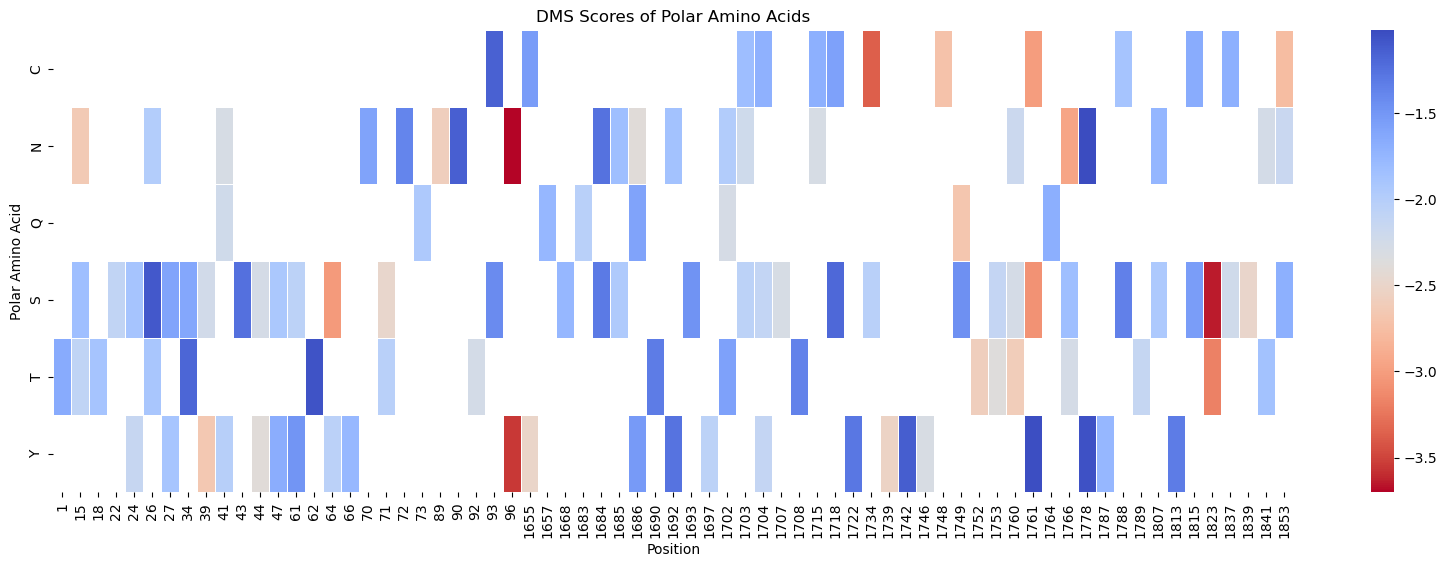

In [73]:
# List of polar amino acids
polar_amino_acids = ['S', 'T', 'Y', 'C', 'N', 'Q']

# Filter the dataset for polar amino acids
polar_data = copy_raw[copy_raw['new_aa'].isin(polar_amino_acids)][['new_aa', 'position', 'DMS_score']]

# Create a pivot table with 'new_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = polar_data.pivot_table(index='new_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('Polar Amino Acid')
plt.title('DMS Scores of Polar Amino Acids')

# Display the heatmap
plt.show()

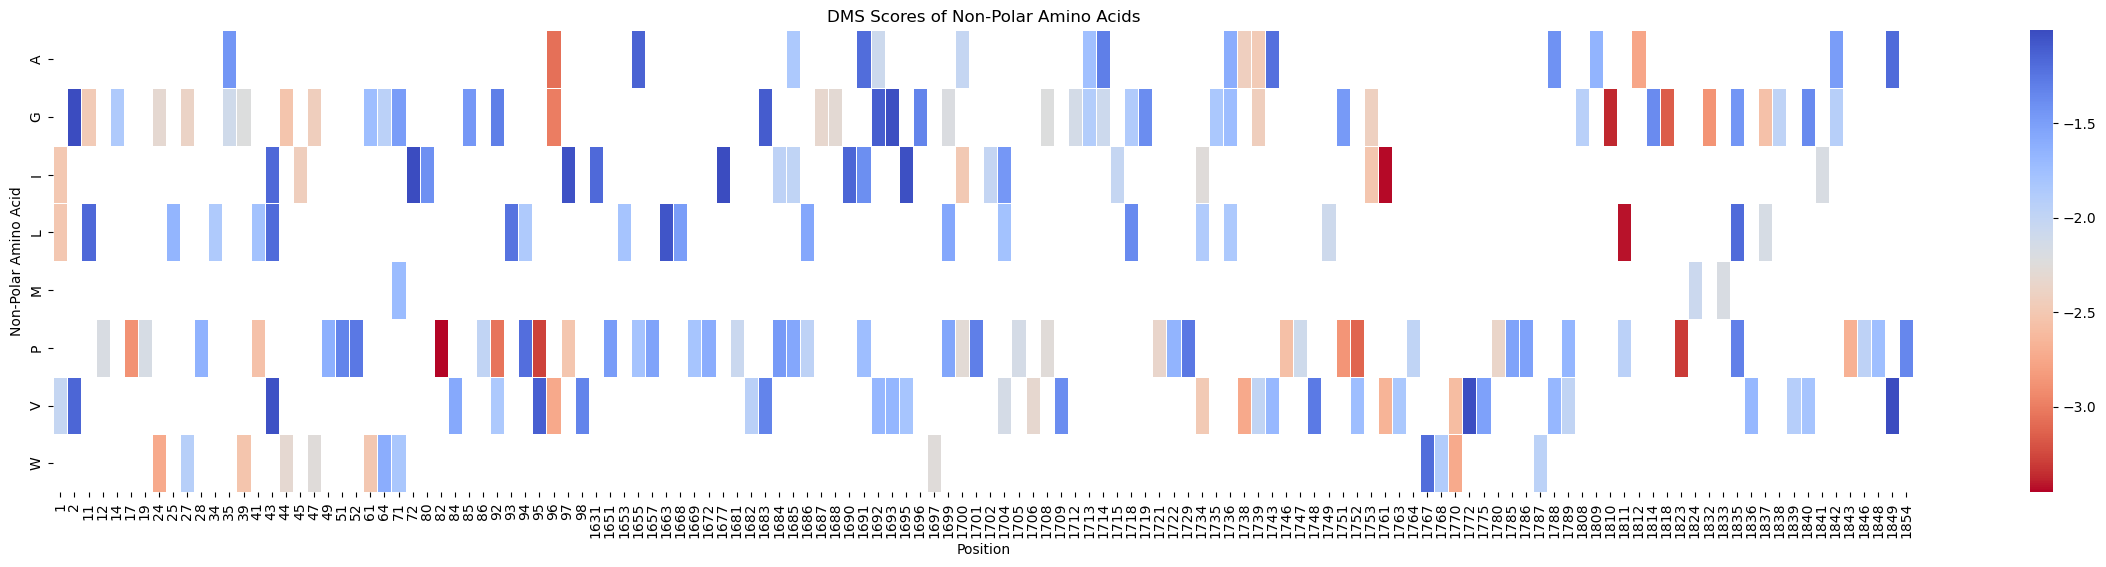

In [75]:
# List of non-polar amino acids
non_polar_amino_acids = ['A', 'V', 'L', 'I', 'P', 'M', 'F', 'W', 'G']

# Filter the dataset for non-polar amino acids
non_polar_data = copy_raw[copy_raw['new_aa'].isin(non_polar_amino_acids)][['new_aa', 'position', 'DMS_score']]

# Create a pivot table with 'new_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = non_polar_data.pivot_table(index='new_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(30, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('Non-Polar Amino Acid')
plt.title('DMS Scores of Non-Polar Amino Acids')

# Display the heatmap
plt.show()

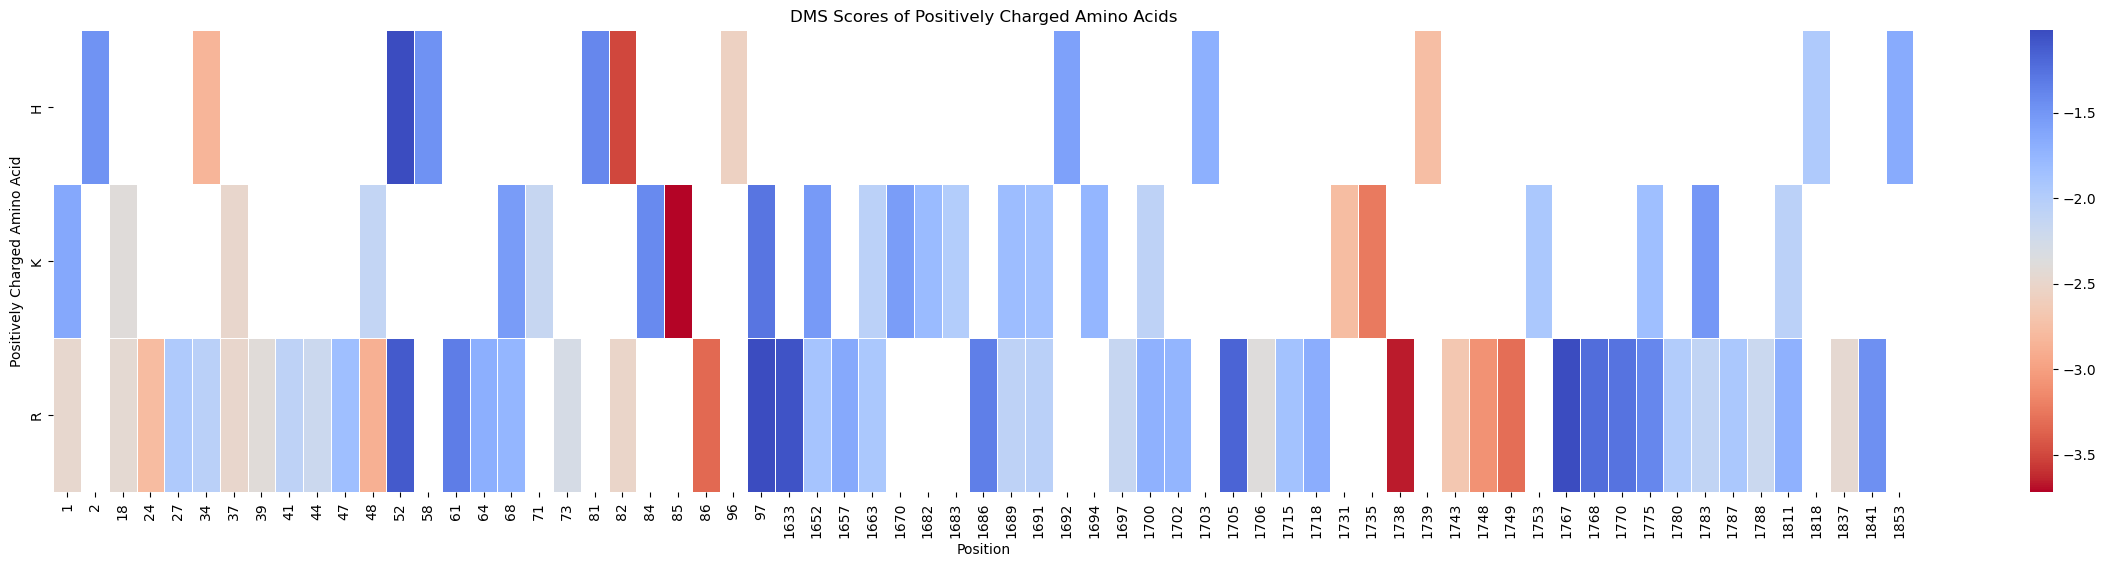

In [77]:
# List of positively charged amino acids
positively_charged_amino_acids = ['R', 'H', 'K']

# Filter the dataset for positively charged amino acids
positively_charged_data = copy_raw[copy_raw['new_aa'].isin(positively_charged_amino_acids)][['new_aa', 'position', 'DMS_score']]

# Create a pivot table with 'new_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = positively_charged_data.pivot_table(index='new_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(30, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('Positively Charged Amino Acid')
plt.title('DMS Scores of Positively Charged Amino Acids')

# Display the heatmap
plt.show()

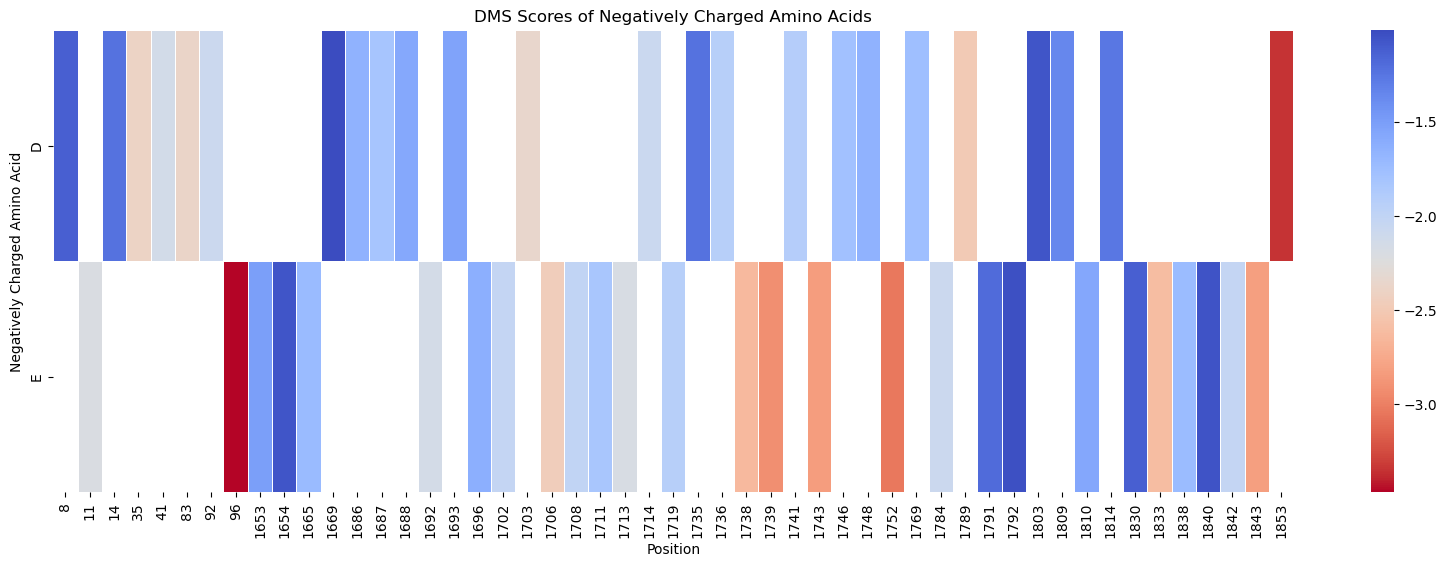

In [80]:
# List of negatively charged amino acids
negatively_charged_amino_acids = ['D', 'E']

# Filter the dataset for negatively charged amino acids
negatively_charged_data = copy_raw[copy_raw['new_aa'].isin(negatively_charged_amino_acids)][['new_aa', 'position', 'DMS_score']]

# Create a pivot table with 'new_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = negatively_charged_data.pivot_table(index='new_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('Negatively Charged Amino Acid')
plt.title('DMS Scores of Negatively Charged Amino Acids')

# Display the heatmap
plt.show()

In [81]:
# Add a new column 'old_aa' using the first symbol of each row from the 'mutant' column
data_raw['old_aa'] = data_raw['mutant'].str[0]

# Display the updated data set
print(data_raw.head())

  mutant                                   mutated_sequence  DMS_score  \
0    M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1    M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2    M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3    M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4    M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   

   DMS_score_bin  position  DMS_score_normalized  dms_score_normalized new_aa  \
0              0         1              0.242003              0.242003      I   
1              0         1              0.336824              0.336824      V   
2              0         1              0.410270              0.410270      T   
3              0         1              0.246092              0.246092      R   
4              0         1              0.239137              0.239137      L   

  old_aa  
0      M  
1      M  
2      M  
3      M  
4      M  


In [82]:
data_raw

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,1,0.242003,0.242003,I,M
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,1,0.336824,0.336824,V,M
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1,0.410270,0.410270,T,M
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,1,0.246092,0.246092,R,M
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,1,0.239137,0.239137,L,M
...,...,...,...,...,...,...,...,...,...
1832,I1855R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.464328,1,1855,0.647526,0.647526,R,I
1833,I1855M,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.021941,1,1855,0.744294,0.744294,M,I
1834,I1855L,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.233297,1,1855,0.786354,0.786354,L,I
1835,I1855K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.863844,1,1855,0.568022,0.568022,K,I


In [83]:
# Add a new column 'old_aa' using the first symbol of each row from the 'mutant' column
copy_raw['old_aa'] = copy_raw['mutant'].str[0]

# Display the updated data set
print(data_raw.head())

  mutant                                   mutated_sequence  DMS_score  \
0    M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1    M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2    M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3    M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4    M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   

   DMS_score_bin  position  DMS_score_normalized  dms_score_normalized new_aa  \
0              0         1              0.242003              0.242003      I   
1              0         1              0.336824              0.336824      V   
2              0         1              0.410270              0.410270      T   
3              0         1              0.246092              0.246092      R   
4              0         1              0.239137              0.239137      L   

  old_aa  
0      M  
1      M  
2      M  
3      M  
4      M  


In [84]:
copy_raw

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,new_aa,old_aa
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,1,0.242003,0.242003,I,M
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,1,0.336824,0.336824,V,M
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1,0.410270,0.410270,T,M
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,1,0.246092,0.246092,R,M
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,1,0.239137,0.239137,L,M
...,...,...,...,...,...,...,...,...,...
1822,Y1853D,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-3.351372,0,1853,0.073003,0.073003,D,Y
1823,Y1853C,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.763438,0,1853,0.190002,0.190002,C,Y
1824,Y1853S,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.698237,0,1853,0.401978,0.401978,S,Y
1825,Y1853N,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.167195,0,1853,0.308655,0.308655,N,Y


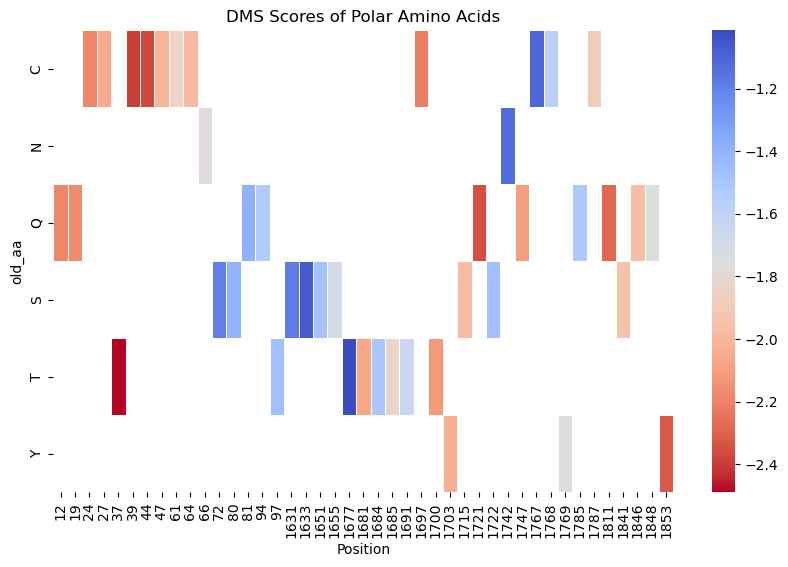

In [101]:
# List of polar amino acids
polar_amino_acids = ['S', 'T', 'Y', 'C', 'N', 'Q']

# Filter the dataset for polar amino acids
polar_data = copy_raw[copy_raw['old_aa'].isin(polar_amino_acids)][['old_aa', 'position', 'DMS_score']]

# Create a pivot table with 'new_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = polar_data.pivot_table(index='old_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('old_aa')
plt.title('DMS Scores of Polar Amino Acids')

# Display the heatmap
plt.show()

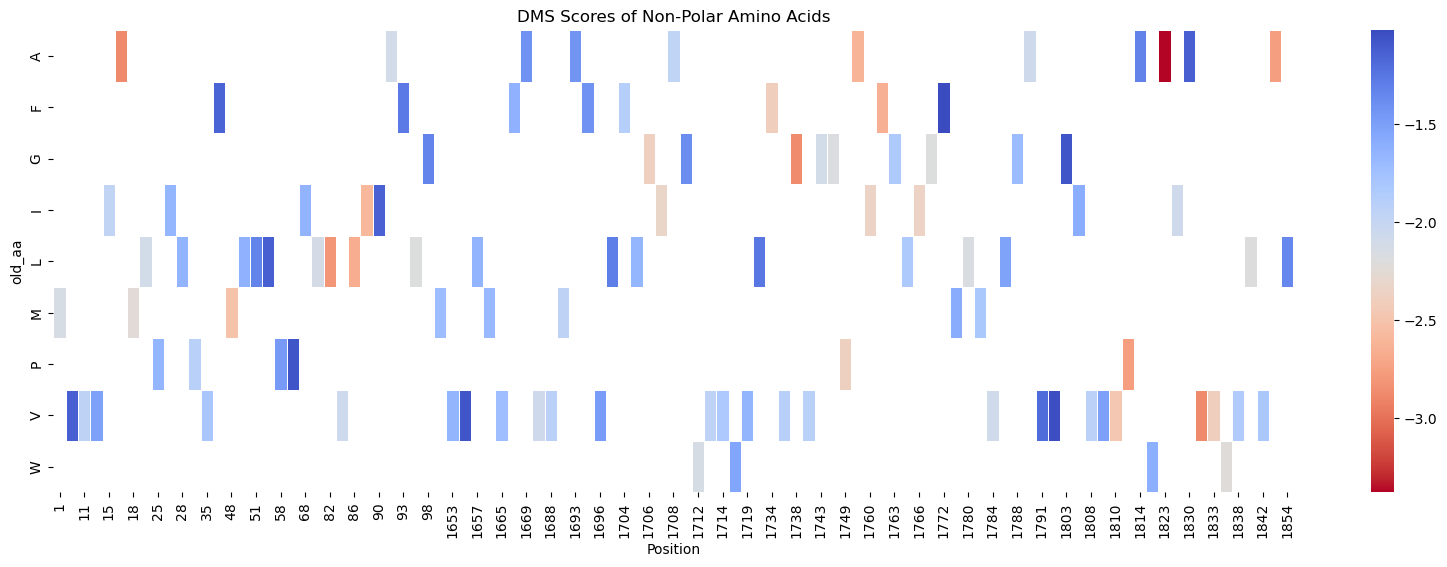

In [103]:
# List of non-polar amino acids
non_polar_amino_acids = ['A', 'V', 'I', 'L', 'M', 'F', 'W', 'G', 'P']

# Filter the dataset for non-polar amino acids
non_polar_data = copy_raw[copy_raw['old_aa'].isin(non_polar_amino_acids)][['old_aa', 'position', 'DMS_score']]

# Create a pivot table with 'old_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = non_polar_data.pivot_table(index='old_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('old_aa')
plt.title('DMS Scores of Non-Polar Amino Acids')

# Display the heatmap
plt.show()

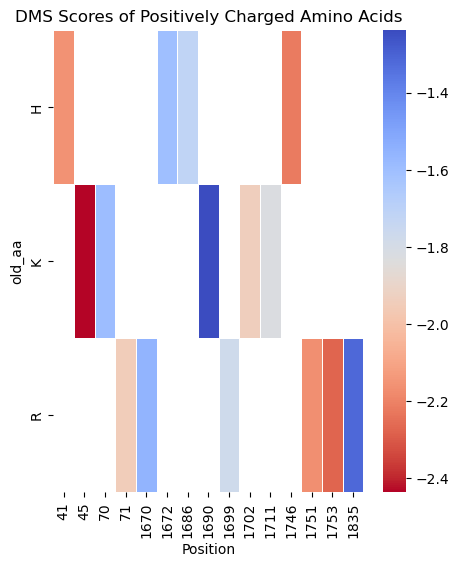

In [105]:
# List of negatively charged amino acids
neg_charged_amino_acids = ['D', 'E']

# Filter the dataset for negatively charged amino acids
neg_charged_data = copy_raw[copy_raw['old_aa'].isin(neg_charged_amino_acids)][['old_aa', 'position', 'DMS_score']]

# Create a pivot table with 'old_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = neg_charged_data.pivot_table(index='old_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('old_aa')
plt.title('DMS Scores of Negatively Charged Amino Acids')

# Display the heatmap
plt.show()

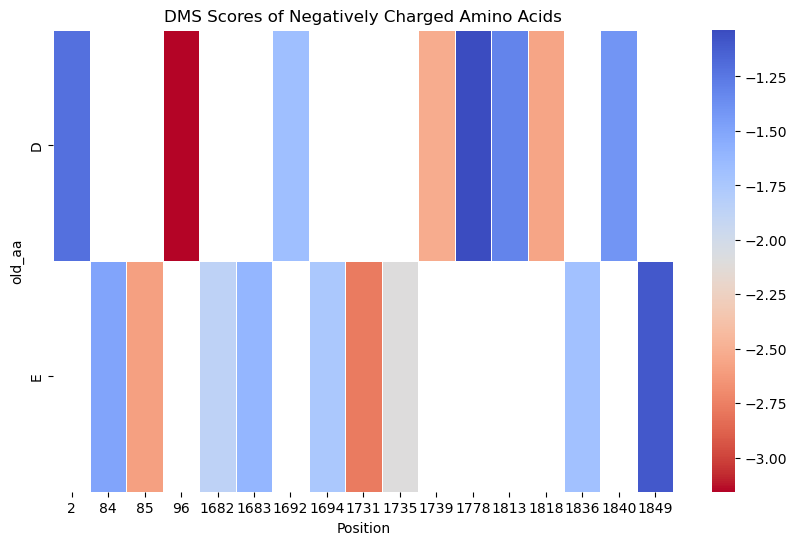

In [106]:
# List of negatively charged amino acids
neg_charged_amino_acids = ['D', 'E']

# Filter the dataset for negatively charged amino acids
neg_charged_data = copy_raw[copy_raw['old_aa'].isin(neg_charged_amino_acids)][['old_aa', 'position', 'DMS_score']]

# Create a pivot table with 'old_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = neg_charged_data.pivot_table(index='old_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('old_aa')
plt.title('DMS Scores of Negatively Charged Amino Acids')

# Display the heatmap
plt.show()

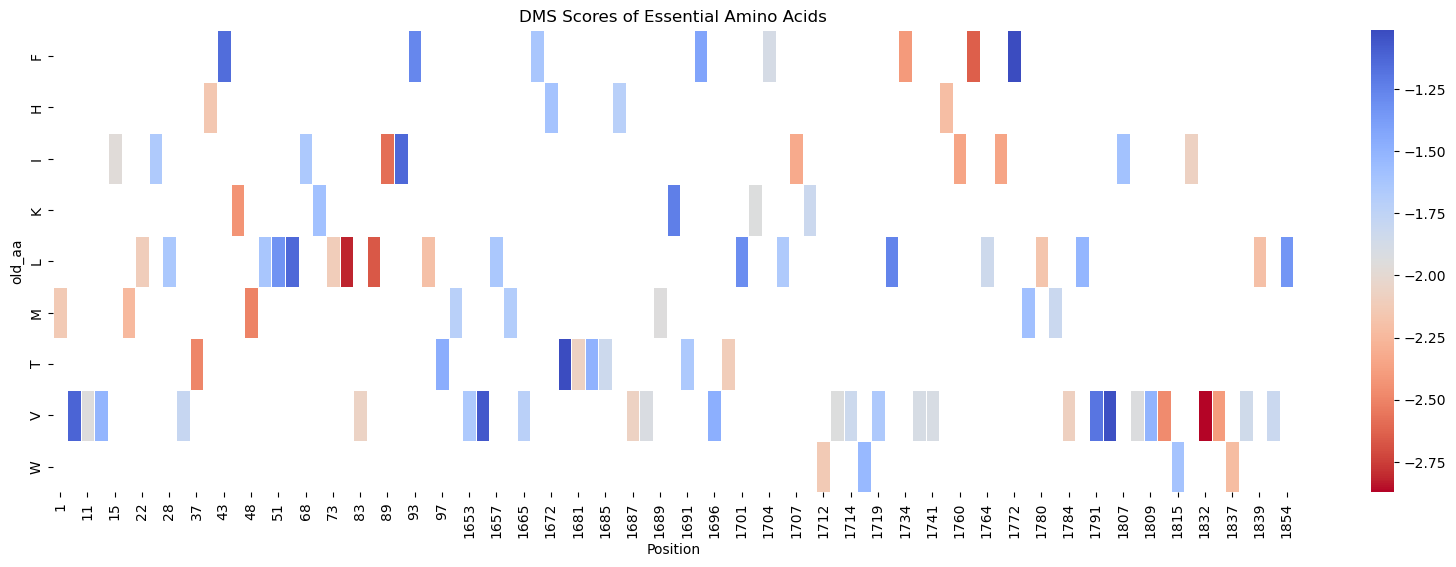

In [108]:
# List of essential amino acids
essential_amino_acids = ['H','I','L','K','M','F','T','W','V']

# Filter the dataset for essential amino acids
essential_data = copy_raw[copy_raw['old_aa'].isin(essential_amino_acids)][['old_aa', 'position', 'DMS_score']]

# Create a pivot table with 'old_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = essential_data.pivot_table(index='old_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('old_aa')
plt.title('DMS Scores of Essential Amino Acids')

# Display the heatmap
plt.show()

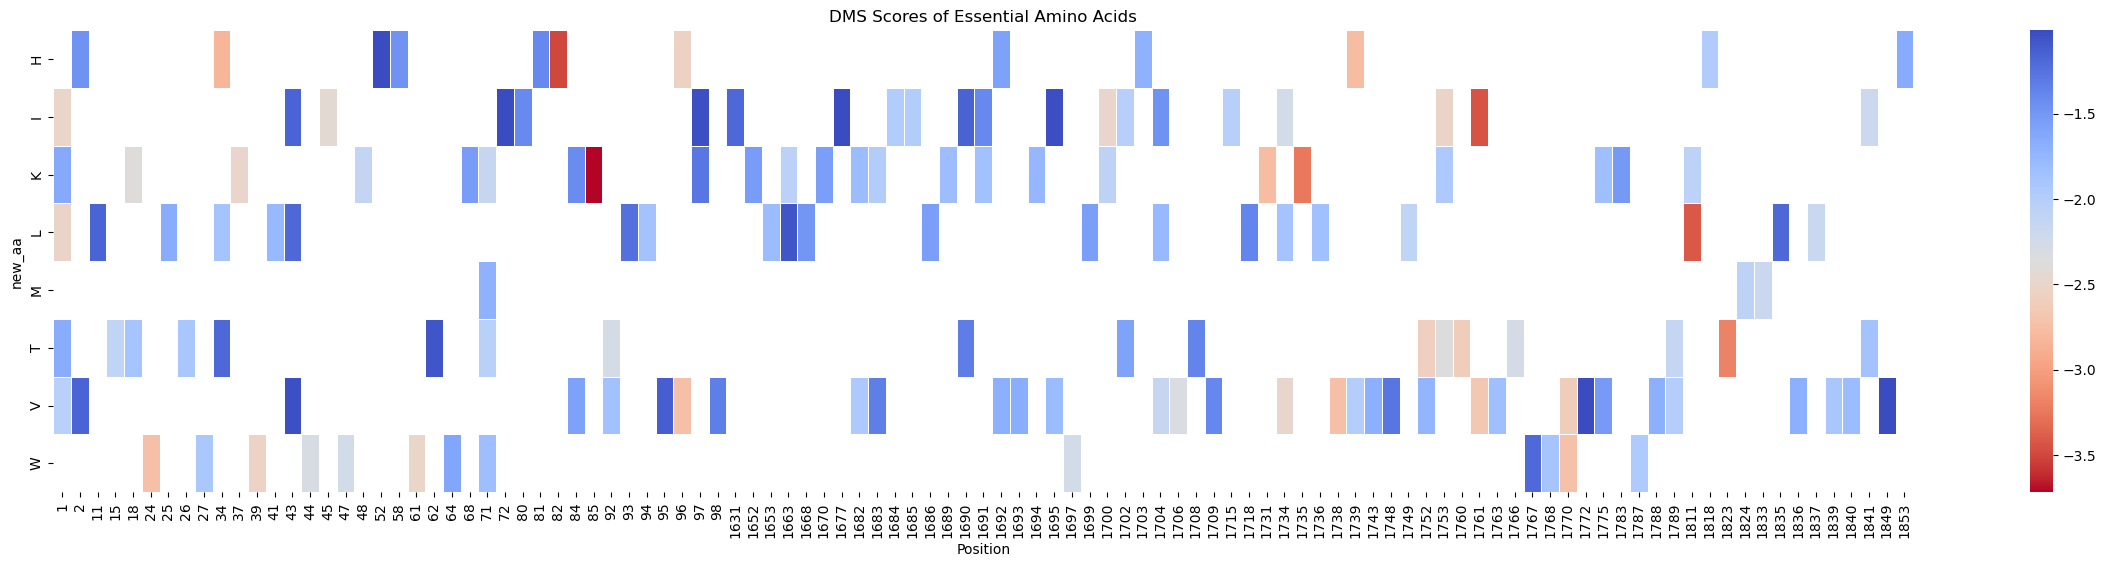

In [110]:
# List of essential amino acids
essential_amino_acids = ['H','I','L','K','M','F','T','W','V']

# Filter the dataset for essential amino acids
essential_data = copy_raw[copy_raw['new_aa'].isin(essential_amino_acids)][['new_aa', 'position', 'DMS_score']]

# Create a pivot table with 'old_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = essential_data.pivot_table(index='new_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(30, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('new_aa')
plt.title('DMS Scores of Essential Amino Acids')

# Display the heatmap
plt.show()

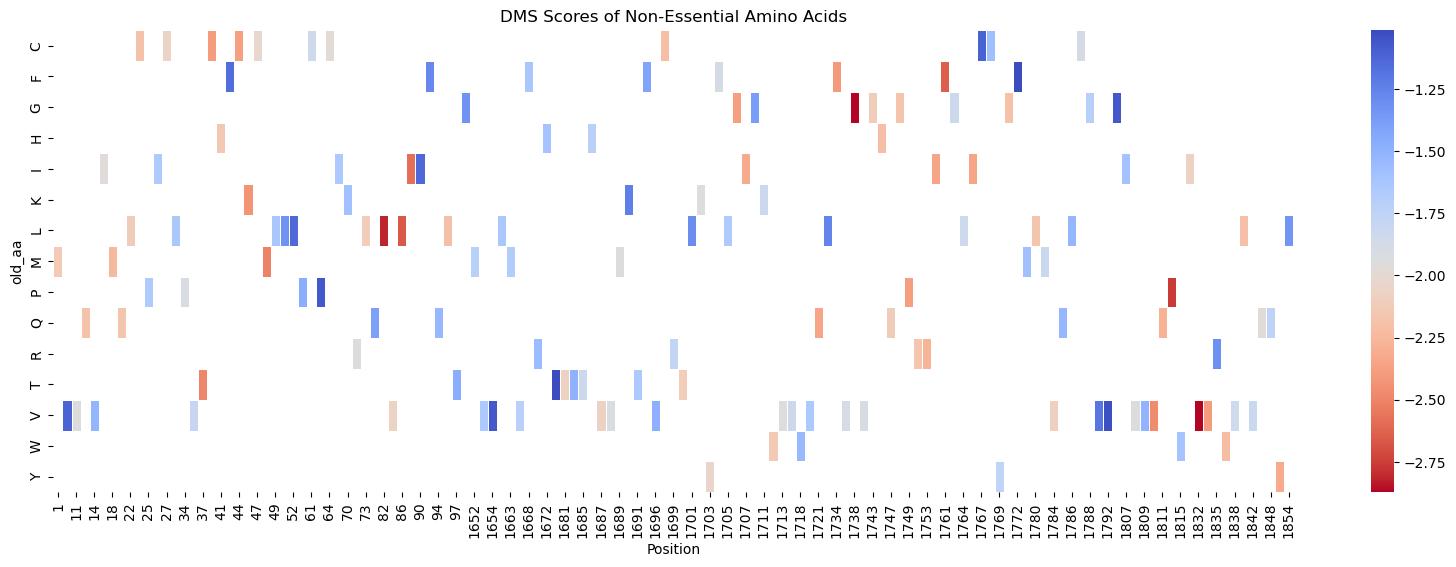

In [112]:
# List of non-essential amino acids
non_essential_amino_acids = ['A', 'D', 'N', 'E', 'S', 'U', 'O']

# Filter the dataset for non-essential amino acids
non_essential_data = copy_raw[~copy_raw['old_aa'].isin(non_essential_amino_acids)][['old_aa', 'position', 'DMS_score']]

# Create a pivot table with 'old_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = non_essential_data.pivot_table(index='old_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('old_aa')
plt.title('DMS Scores of Non-Essential Amino Acids')

# Display the heatmap
plt.show()

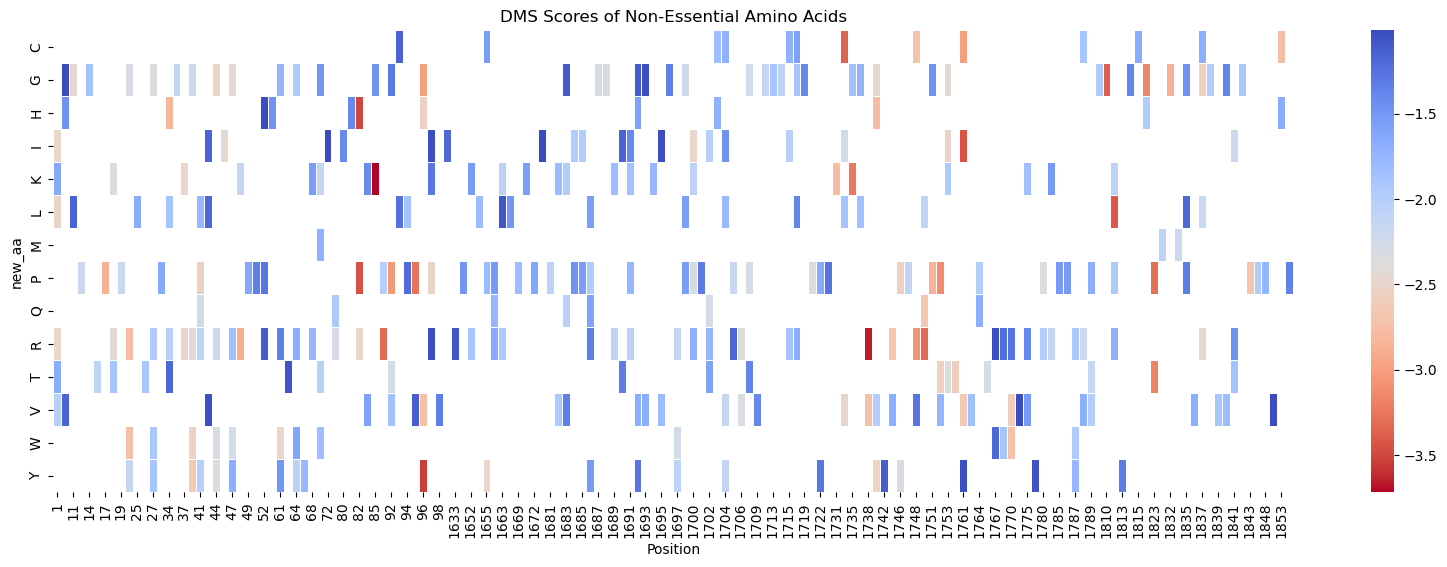

In [114]:
# List of non-essential amino acids
non_essential_amino_acids = ['A', 'D', 'N', 'E', 'S', 'U', 'O']

# Filter the dataset for non-essential amino acids
non_essential_data = copy_raw[~copy_raw['new_aa'].isin(non_essential_amino_acids)][['new_aa', 'position', 'DMS_score']]

# Create a pivot table with 'old_aa' as index, 'position' as columns, and 'DMS_score' as values
pivot_table = non_essential_data.pivot_table(index='new_aa', columns='position', values='DMS_score', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm_r', annot=False, linewidths=0.5)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('new_aa')
plt.title('DMS Scores of Non-Essential Amino Acids')

# Display the heatmap
plt.show()